In [1]:
import usb
import codecs
import struct

In [2]:
LIBUSB_TIMEOUT = 500

REQUEST_STATUS_PACKET = bytes.fromhex('F5FA01010000FE0F')              # Request Status Packet
REQUEST_SPECTRUM_PACKET = bytes.fromhex('F5FA02010000FE0E')            # Request Spectrum Packet
REQUEST_SPECTRUM_STATUS_PACKET = bytes.fromhex('F5FA02030000FE0C')     # Request Spectrum Status Packet

CLEAR_SPECTRUM_BUFFER = bytes.fromhex('F5FAF0010000FD20')              # Clear Spectrum Buffer
ENABLE_MCA_MCS = bytes.fromhex('F5FAF0020000FD1F')                     # Enable MCA MCS
DISABLE_MCA_MCS = bytes.fromhex('F5FAF0030000FD1E')                    # Disable MCA MCS

ACK_RESPONSE = bytes.fromhex('F5FAFF000000FD12')                       # Ack 0 response, message is OK

print(REQUEST_STATUS_PACKET)

b'\xf5\xfa\x01\x01\x00\x00\xfe\x0f'


In [3]:

VENDOR = 0x10C4
PRODUCT = 0x842A
for bus in usb.busses():
    for dev in bus.devices:
        if dev.idVendor == VENDOR and dev.idProduct == PRODUCT:
            print(VENDOR)
            print(PRODUCT)
            device = dev

4292
33834


In [4]:

CONFIGURATION = 1
INTERFACE = 0
ENDPOINT_IN = 0x81
ENDPOINT_OUT = 0x02

handle = device.open()
handle.setConfiguration(CONFIGURATION)
handle.claimInterface(INTERFACE)

In [5]:
def write( buffer, timeout = 0):
        return handle.bulkWrite(ENDPOINT_OUT, buffer, timeout)

def read(length, timeout = 0):
         return handle.bulkRead(ENDPOINT_IN, length, timeout)

In [6]:


iNumBytes = write(REQUEST_STATUS_PACKET, LIBUSB_TIMEOUT)

if iNumBytes  > 0:
    print ('Bytes Out =',iNumBytes )    # debug
    bArrArrBuffer = read(128, LIBUSB_TIMEOUT)
    bArrStatusIn = bytearray(bArrArrBuffer)


Bytes Out = 8


In [7]:
print(bArrArrBuffer[0:-1])

array('B', [245, 250, 128, 1, 0, 64, 74, 69, 2, 0, 27, 150, 0, 0, 148, 26, 0, 0, 11, 159, 161, 24, 32, 101, 51, 0, 44, 71, 159, 9, 106, 119, 163, 150, 0, 0, 6, 63, 8, 45, 27, 47, 0, 4, 192, 0, 0, 0, 0, 20, 2, 189, 0, 0, 127, 80, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 242])


In [8]:
# Convert the list of integers to a bytearray
byte_data = bytearray(bArrStatusIn[6:70])

# Convert the bytearray to a hexadecimal string
hex_string = byte_data.hex()
print(hex_string)
result_string = codecs.decode(hex_string, 'hex').decode('utf-8')
print(result_string)

4a4502001b960000941a00000b9fa118206533002c479f096a77a3960000063f082d1b2f0004c0000000001402bd00007f500000000000000000000000000000


UnicodeDecodeError: 'utf-8' codec can't decode byte 0x96 in position 5: invalid start byte

In [9]:
iNumBytes = write(REQUEST_SPECTRUM_STATUS_PACKET, LIBUSB_TIMEOUT)
print( 'Bytes Out =',iNumBytes)     # debug
bArrArrBuffer = read(6216, LIBUSB_TIMEOUT)
bArrStatusIn = bytearray(bArrArrBuffer)

# print type(self.bArrStatusIn)
# print self.bArrStatusIn.encode('hex')
if len(bArrStatusIn) > 0:
    Header = bytearray(bArrStatusIn[0:5])
    bPID2 = Header[3]           
    Channels = 256 *  ( 2 **  ( ( ( bPID2 - 1 )  & 14 )  // 2 ) )
    print ("Channels Calc ", (Channels))
    DataRaw = bytearray(bArrStatusIn[6:Channels*3+6])

Bytes Out = 8
Channels Calc  2048


In [10]:
Data=[]
print(len(DataRaw))
print(len(DataRaw)/3)
for X in range(0,int(Channels)*3,3):
    Data.append((DataRaw[X]) + (DataRaw[X + 1]) * 256 + (DataRaw[X + 2]) * 256**2)
print(len(Data))

6144
2048.0
2048


2048


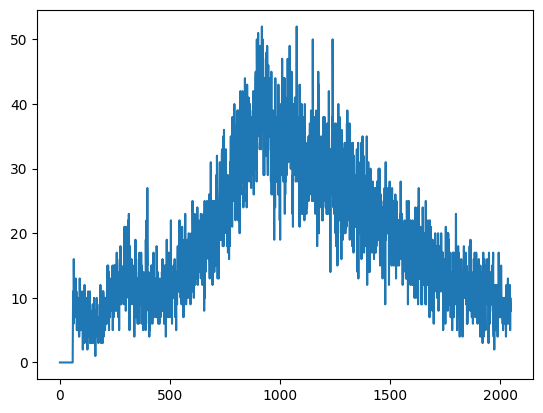

In [11]:
import matplotlib.pyplot as plt
import numpy as np

print(len(Data))

plt.plot(np.array(Data))
plt.show()

In [19]:
256/2/2/2/2

16.0

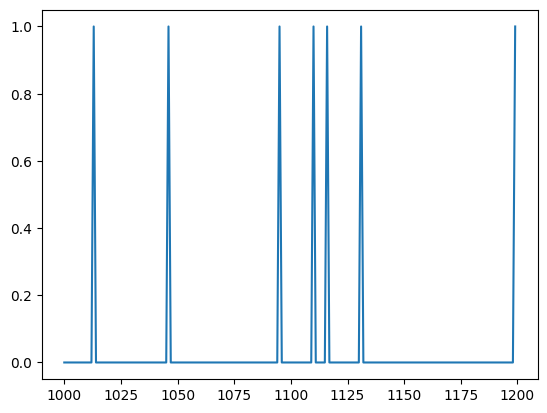

In [46]:
plot= np.array(Data)
x1=1000
x2=1200
plt.plot(range(x1,x2),plot[x1:x2])
plt.show()

In [52]:
plot[1131]

np.int64(1)